In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

import keras
import tensorflow

from keras.preprocessing.image import ImageDataGenerator

from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

from tensorflow.keras.utils import img_to_array

from keras_preprocessing.image import load_img

In [1]:
pwd

'/home/wsuser/work'

In [72]:
!pip install keras==2.7.0
!pip install tensorflow==2.5.0

     |████████████████████████████████| 1.3 MB 22.6 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D,MaxPooling2D,Flatten


import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [6]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale= 1/255)

In [12]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='sqW5sebCfgV2IwltVLYYNSMMA_qb8OR0TvIRmIR66mUM',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fertilizersrecommendationsystemfo-donotdelete-pr-hq7lq5kh6x1sqk'
object_key = 'Dataset Plant Disease.zip'

streaming_body_4 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [13]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_4.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [14]:
x_train=train_datagen.flow_from_directory(r'/home/wsuser/work/Dataset Plant Disease/fruit-dataset/test',target_size=(256,256),class_mode='categorical',batch_size=32)
x_val=val_datagen.flow_from_directory(r'/home/wsuser/work/Dataset Plant Disease/fruit-dataset/train',target_size=(256,256),class_mode='categorical',batch_size=32)

Found 1686 images belonging to 6 classes.
Found 5384 images belonging to 6 classes.


In [15]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [17]:
model=Sequential()

2022-11-19 12:36:56.069924: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/ibm/dsdriver/lib:/opt/oracle/lib:/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow
2022-11-19 12:36:56.069970: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)


In [18]:
model.add(Convolution2D(32,(3,3),input_shape=(256,256,3),activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 516128)            0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(6,activation='softmax'))

In [23]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [24]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_val,validation_steps=len(x_val),epochs=10)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
53/53 [==============================] - 210s 4s/step - loss: 3420.4985 - accuracy: 0.4899 - val_loss: 0.9614 - val_accuracy: 0.7379
Epoch 2/10
53/53 [==============================] - 210s 4s/step - loss: 38.8511 - accuracy: 0.7651 - val_loss: 1.2296 - val_accuracy: 0.5942
Epoch 3/10
53/53 [==============================] - 208s 4s/step - loss: 15.5424 - accuracy: 0.8149 - val_loss: 1.2816 - val_accuracy: 0.5111
Epoch 4/10
53/53 [==============================] - 213s 4s/step - loss: 8.6473 - accuracy: 0.8505 - val_loss: 1.2637 - val_accuracy: 0.5724
Epoch 5/10
53/53 [==============================] - 211s 4s/step - loss: 4.3014 - accuracy: 0.8790 - val_loss: 1.3208 - val_accuracy: 0.5314
Epoch 6/10
53/53 [==============================] - 211s 4s/step - loss: 2.8933 - accuracy: 0.8802 - val_loss: 1.3677 - val_accuracy: 0.6168
Epoch 7/10
53/53 [==============================] - 214s 4s/step - loss: 2.0276 - accuracy: 0.8921 - val_loss: 1.3779 - val_accuracy: 0.6504
Epoch 8/

In [25]:
model.save('fruit.h5')

In [26]:
!tar -zcvf fruit_recommendation_model.tgz fruit.h5

fruit.h5


In [27]:
ls -1

'Dataset Plant Disease'/
'Fertilizers_Recommendation_ System_For_Disease_ Prediction'/
fruit.h5
fruit_recommendation_model.tgz


In [28]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.5 MB/s eta 0:00:01


In [29]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"3yH2rIE3zfSQ8wqpVxCvDSMDa9FXWVGgnpGzifTtMQkd"
}
client=APIClient(wml_credentials)

/opt/conda/envs/Python-3.9/lib/python3.9/site-packages/torch/package/_directory_reader.py:17: UserWarning: Failed to initialize NumPy: module compiled against API version 0xe but this version of numpy is 0xd (Triggered internally at  /opt/conda/conda-bld/pytorch-base_1658814980981/work/torch/csrc/utils/tensor_numpy.cpp:68.)
  _dtype_to_storage = {data_type(0).dtype: data_type for data_type in _storages}


In [30]:
client=APIClient(wml_credentials)

In [31]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"]==space_name)['metadata']['id'])

In [32]:
space_uid=guid_from_space_name(client,'fruit_deployment_space')
print("Space UID="+space_uid)

Space UID=320b9e27-1f69-412d-a17b-cbc811414128


In [73]:
client.set.default_space(space_uid)

'SUCCESS'

In [74]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [75]:
software_spec_uid=client.software_specifications.get_uid_by_name("tensorflow_rt22.1-py3.9")
software_spec_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [79]:
model_details=client.repository.store_model(model='fruit_recommendation_model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Fertilizer_Recommendation",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})
model_id=client.repository.get_model_id(model_details)



In [80]:
model_id

'50339a30-b40c-4b64-a1ff-c3f44b518b4c'

In [78]:
client.repository.download(model_id,'fruit_model.tar.gz')

Successfully saved model content to file: 'fruit_model.tar.gz'


'/home/wsuser/work/fruit_model.tar.gz'

In [ ]:
model= load_model("/home/wsuser/work/fruit.h5")

In [ ]:
img=image.load_img(streaming_body_,target_size=(256,256))

In [ ]:
x_train=train_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/test_set',target_size=(256,256),class_mode='categorical',batch_size=32)
x_val=val_datagen.flow_from_directory(r'/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/train_set',target_size=(256,256),class_mode='categorical',batch_size=32)

Found 3416 images belonging to 9 classes.
Found 11386 images belonging to 9 classes.


In [ ]:
t_img, label = x_train.next()

In [ ]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.imshow(im/255)
    plt.show()

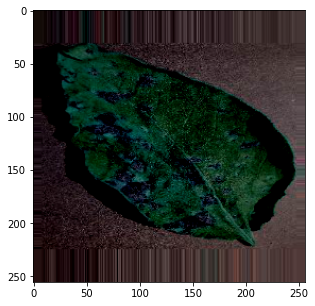

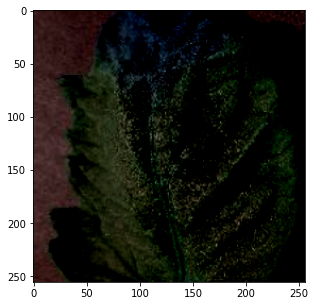

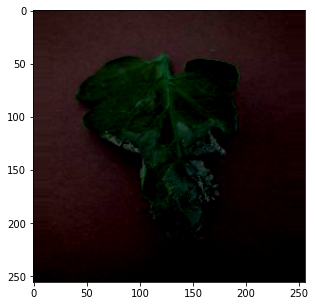

In [ ]:
plotImage(t_img[:3], label[:3])

In [ ]:
from keras.layers import Dense, Flatten 
from keras.models import Model
from keras.applications.vgg19 import VGG19
import keras

In [ ]:
base_model = VGG19(input_shape=(256, 256, 3), include_top = False)

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable= False

In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
X = Flatten()(base_model.output)
X= Dense(units = 9, activation='softmax')(X)

#creating our model
model = Model(base_model.input, X)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
import tensorflow as tf
tf.keras.losses.CategoricalCrossentropy()
loss = 'categorical_crossentropy'
model.compile(optimizer= 'adam', loss = 'categorical_crossentropy' , metrics=['accuracy'])

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es= EarlyStopping(monitor= 'val_accuracy',min_delta=0.01, patience = 3, verbose = 1)

#model check point
mc= ModelCheckpoint(filepath ="veg_model.h5", 
                    monitor= 'val_accuracy', 
                    min_delta=0.01, 
                    patience= 3, 
                    verbose = 1, 
                    save_best_only= True)
cb= [es, mc]

In [ ]:
his= model.fit_generator(x_train, steps_per_epoch = 16, epochs= 50, verbose= 1, callbacks= cb, validation_data= x_val, validation_steps = 16)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/50
16/16 [==============================] - ETA: 0s - loss: 17.5005 - accuracy: 0.3965 

KeyboardInterrupt: ignored

In [ ]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

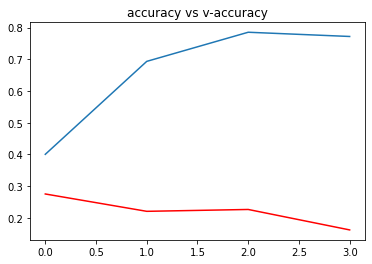

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c= "red")
plt.title("accuracy vs v-accuracy")
plt.show()

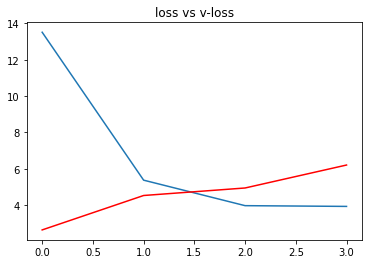

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'], c= "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
#load best model
from keras.models import load_model
model= load_model("/content/veg_model.h5")

In [ ]:
ref = dict(zip(list(x_train.class_indices.values()) , list(x_train.class_indices.keys())))
ref

{0: 'Pepper,_bell___Bacterial_spot',
 1: 'Pepper,_bell___healthy',
 2: 'Potato___Early_blight',
 3: 'Potato___Late_blight',
 4: 'Potato___healthy',
 5: 'Tomato___Bacterial_spot',
 6: 'Tomato___Late_blight',
 7: 'Tomato___Leaf_Mold',
 8: 'Tomato___Septoria_leaf_spot'}

In [ ]:
def prediction(path):
  img= load_img(path,target_size=(256, 256))
  i=img_to_array(img)
  im=preprocess_input(i)
  img= np.expand_dims(im, axis=0)
  pred = np.argmax(model.predict(img))
  ref = dict(zip(list(x_train.class_indices.values()) , list(x_train.class_indices.keys())))
  print(f" the image belongs to {pred}{ref[pred]}")

In [ ]:
#prediction of images into numbers
path = "/content/drive/MyDrive/Dataset Plant Disease/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.JPG"
prediction(path)

1/1 [==============================] - 1s 913ms/step
 the image belongs to 0Pepper,_bell___Bacterial_spot
